In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# %pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,680.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.523846,0.460180,37.966864,6328.89332
1,1,514.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.583380,0.485219,40.813181,7502.24389
2,2,431.0,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.429001,0.408851,31.881847,4587.38557
3,3,656.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.404225,0.401708,30.798351,4234.86859
4,4,594.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.509001,0.452027,35.884011,6026.06365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,153.0,12.5,0.25,0.25,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.462102,0.428904,33.331194,5322.84043
14996,14996,388.0,12.5,0.25,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.542170,0.459384,43.755034,8357.06722
14997,14997,194.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.545095,0.467854,38.317710,6578.23522
14998,14998,703.0,12.5,0.25,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.551264,0.476149,40.402916,7041.38018


In [5]:
train.drop("id", axis = 1, inplace = True)

# Exploratory Data Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  15000 non-null  float64
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass          

#### There is no NaN in this dataset.

In [7]:
train.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,428.552400,19.788167,0.392244,0.283986,0.488813,0.589411,82.269053,49.730460,68.735207,59.299213,28.693973,48.626847,18.758352,0.326333,0.500095,0.445593,36.062045,6010.883275
std,212.755628,6.622069,0.448164,0.059063,0.149433,0.146088,9.153763,5.550444,7.647413,6.615709,3.197790,5.397329,11.813316,0.166055,0.076495,0.037777,4.092188,1347.446017
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.163652,0.211830,22.079199,1637.704020
25%,252.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451911,0.418220,33.239806,5136.932470
50%,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.502842,0.445494,35.923314,6097.442850
75%,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.471713,38.934512,7016.893850
max,933.000000,40.000000,18.430000,0.588000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.937253,0.937853,46.585105,8969.401840


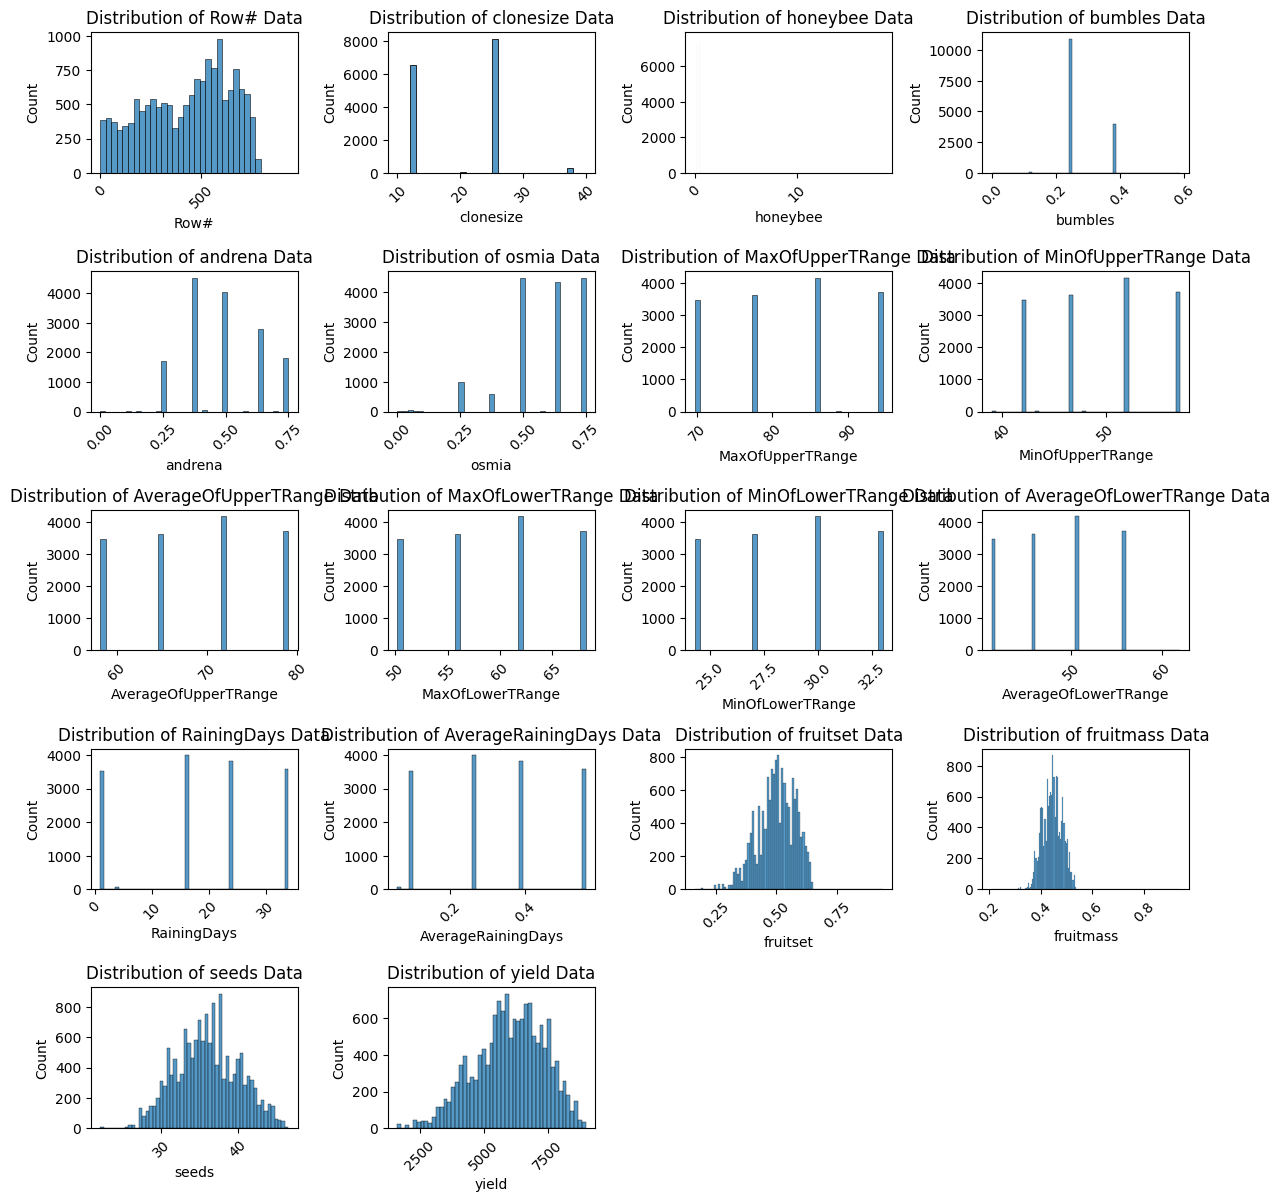

In [12]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(train.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(x = train[col])
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

In [13]:
prime_cols = ["clonesize", "honeybee", "bumbles", "andrena", "osmia", "AverageRainingDays"]
for col in prime_cols:
    print(f"{col} data has :", train[col].nunique(), "values.")
    print(train[col].value_counts())

clonesize data has : 6 values.
clonesize
25.0    8135
12.5    6518
37.5     287
20.0      58
40.0       1
10.0       1
Name: count, dtype: int64
honeybee data has : 7 values.
honeybee
0.500     7570
0.250     7233
0.750      123
0.537       45
0.000       17
18.430       8
6.640        4
Name: count, dtype: int64
bumbles data has : 9 values.
bumbles
0.250    10932
0.380     3995
0.117       50
0.000        9
0.065        5
0.042        4
0.293        2
0.585        2
0.588        1
Name: count, dtype: int64
andrena data has : 13 values.
andrena
0.380    4536
0.500    4062
0.630    2798
0.750    1814
0.250    1716
0.409      52
0.000       9
0.229       7
0.585       2
0.262       1
0.117       1
0.707       1
0.147       1
Name: count, dtype: int64
osmia data has : 12 values.
osmia
0.750    4498
0.500    4497
0.630    4360
0.250     990
0.380     581
0.058      53
0.000      10
0.033       6
0.021       2
0.585       1
0.078       1
0.101       1
Name: count, dtype: int64
AverageRainin

#### In case of clonesize, main values are 12.5 & 25.0.
#### In case of honeybee, main values are 0.25 & 0.5.
#### In case of bumbles, main values are 0.25 & 0.38.
#### In case of andrena, main values are 0.25 & 0.38 & 0.5 & 0.63 & 0.75.
#### In case of osmia, main values are 0.5 & 0.63 & 0.75.
#### In case of AverageRainingDays, main values are 0.1 & 0.26 & 0.39 & 0.56.

In [14]:
# Check Correlation of Target
train_corr = train.corr()
train_corr["yield"].sort_values(ascending = False)

yield                   1.000000
fruitset                0.946233
seeds                   0.920393
fruitmass               0.884357
osmia                   0.270417
bumbles                 0.170650
andrena                 0.131270
AverageOfUpperTRange   -0.003929
MinOfUpperTRange       -0.004194
AverageOfLowerTRange   -0.004217
MinOfLowerTRange       -0.004273
MaxOfLowerTRange       -0.004303
MaxOfUpperTRange       -0.004486
Row#                   -0.022522
honeybee               -0.100960
clonesize              -0.393196
RainingDays            -0.494318
AverageRainingDays     -0.504169
Name: yield, dtype: float64

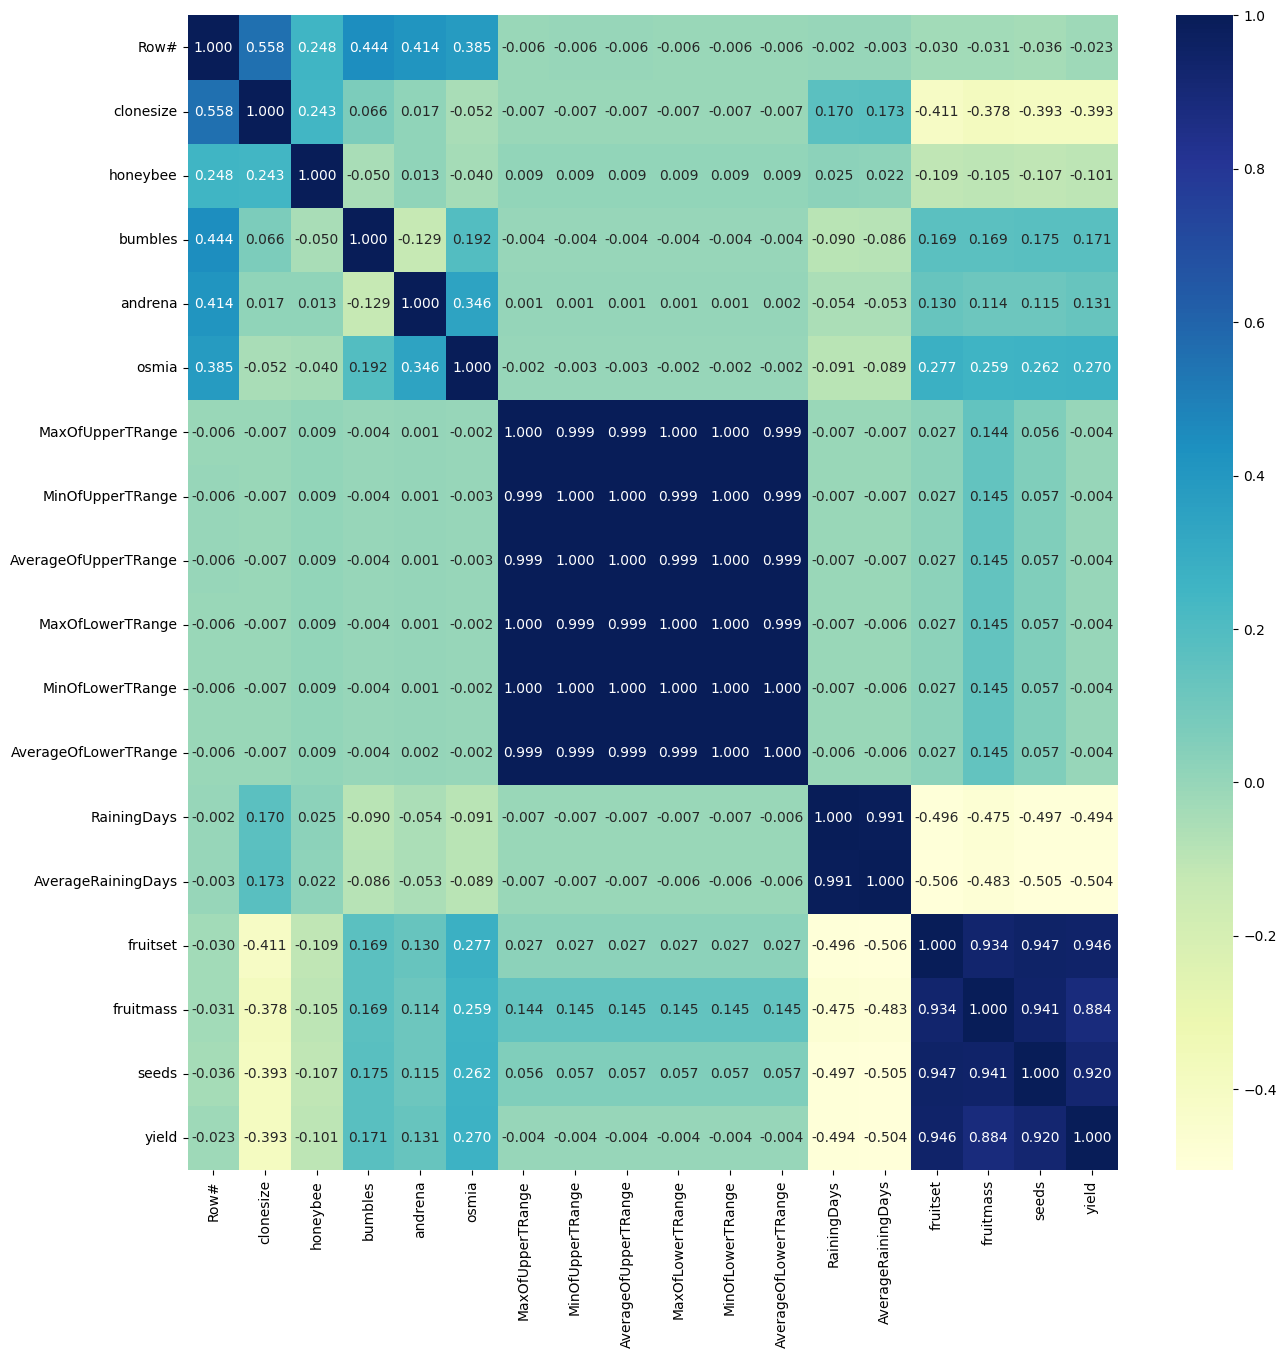

In [15]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_corr, fmt = ".3f", annot = True, cmap = "YlGnBu")
plt.show()

#### Of all features, "TRange" features has highest correlation with each other.
#### "fruitset"/"fruitmass"/"seeds" have high correlation with target("yield"). 

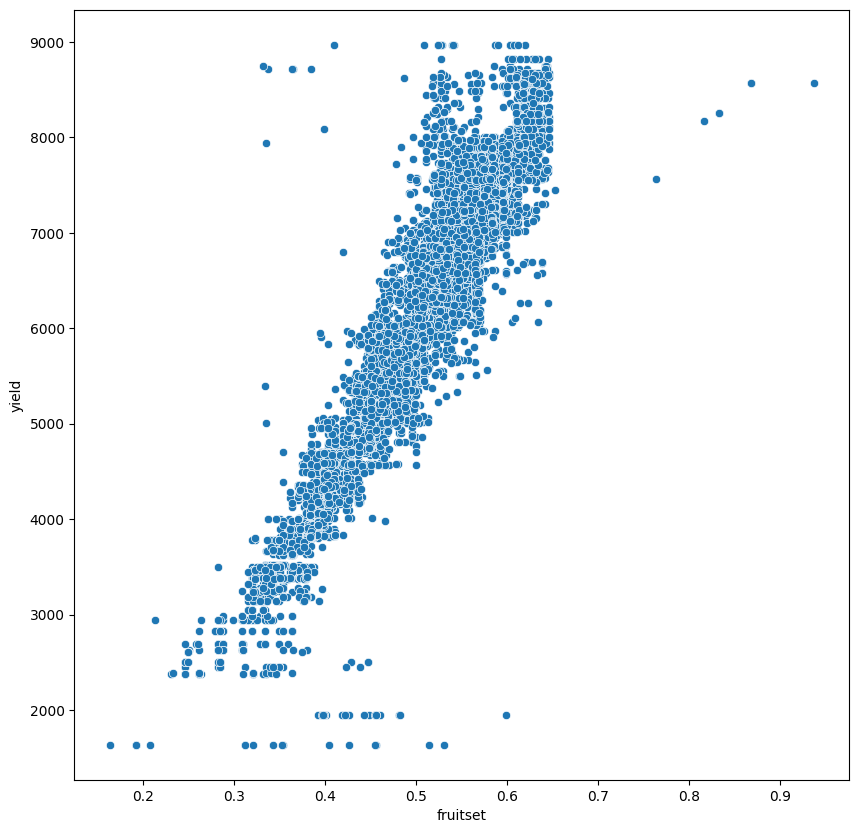

In [16]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = train["fruitset"], y = train["yield"])
plt.show()

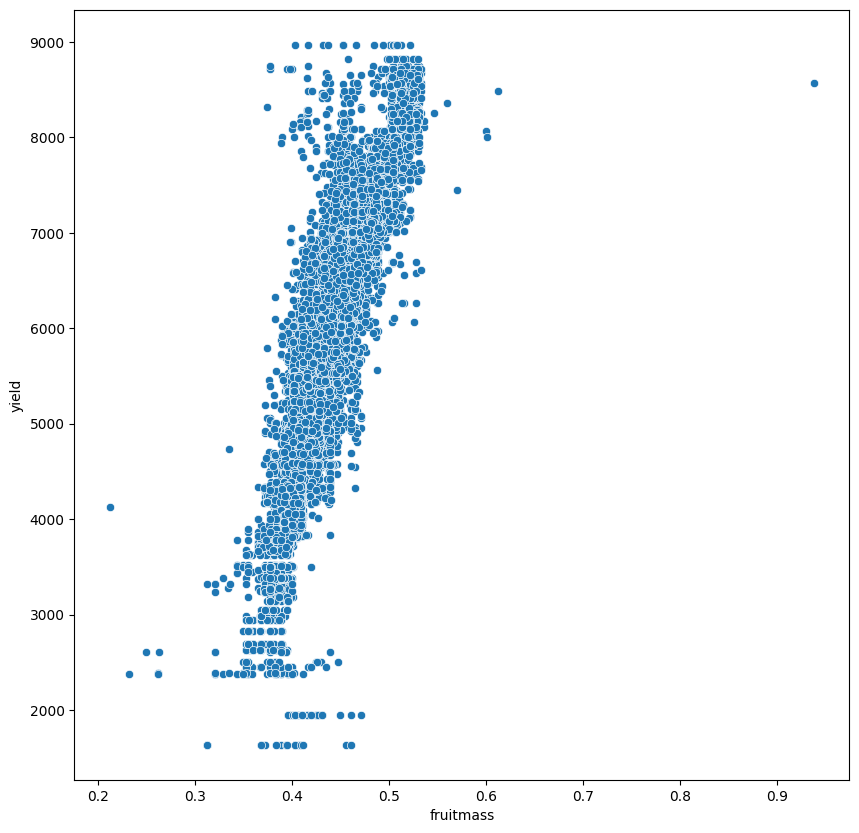

In [18]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = train["fruitmass"], y = train["yield"])
plt.show()

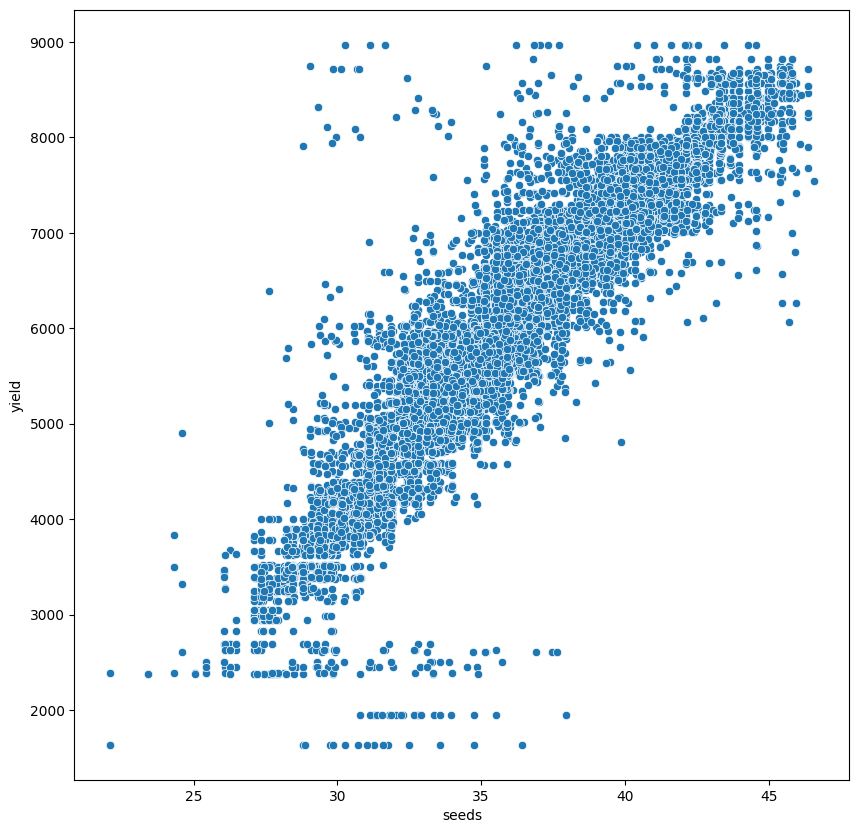

In [19]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = train["seeds"], y = train["yield"])
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 17

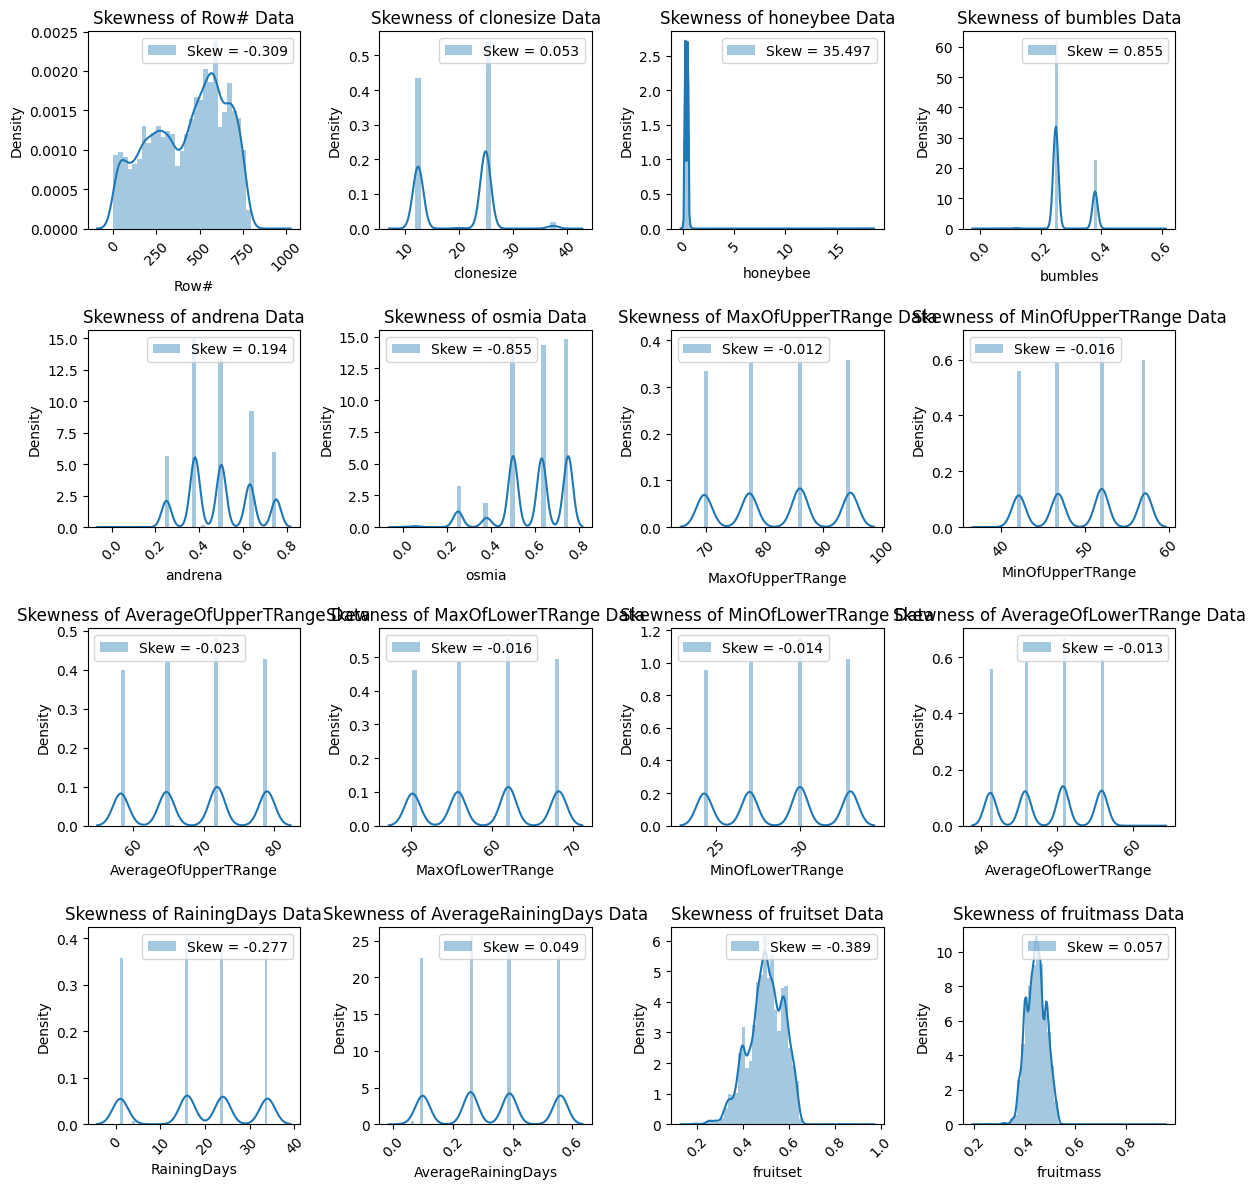

In [20]:
# Check Skewness of all feature
plt.figure(figsize = (12, 12))
for i, col in enumerate(train.columns[:-1], 1):
    plt.subplot(4, 4, i)
    skewness = train[col].skew()
    sns.distplot(train[col], kde = True, label = "Skew = %.3f" %(skewness))
    plt.title(f"Skewness of {col} Data")
    plt.tight_layout()
    plt.legend(loc = "best")
    plt.xticks(rotation = 45)
    plt.plot()

#### "honeybee" feature has very high skewness in this dataset.
#### It seems that it has many outliers.
#### Let's remove them on this feature.

# Preprocessing

In [21]:
# Remove outliers on "honeybee" feature
mean = train["honeybee"].mean()
std_dev = train["honeybee"].std()
z_score = (train["honeybee"] - mean) / std_dev
p_value = 2*(1 - norm.cdf(abs(z_score)))
train = train[p_value > 0.05]
train

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,680.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.523846,0.460180,37.966864,6328.89332
1,514.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.583380,0.485219,40.813181,7502.24389
2,431.0,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.429001,0.408851,31.881847,4587.38557
3,656.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.404225,0.401708,30.798351,4234.86859
4,594.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.509001,0.452027,35.884011,6026.06365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,153.0,12.5,0.25,0.25,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.462102,0.428904,33.331194,5322.84043
14996,388.0,12.5,0.25,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.542170,0.459384,43.755034,8357.06722
14997,194.0,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.545095,0.467854,38.317710,6578.23522
14998,703.0,12.5,0.25,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.551264,0.476149,40.402916,7041.38018


#### 8 rows are removed.

In [22]:
# Split dataset with train/test
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Standarization on X_train & X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Prediction of Trarget("yield")

<Axes: >

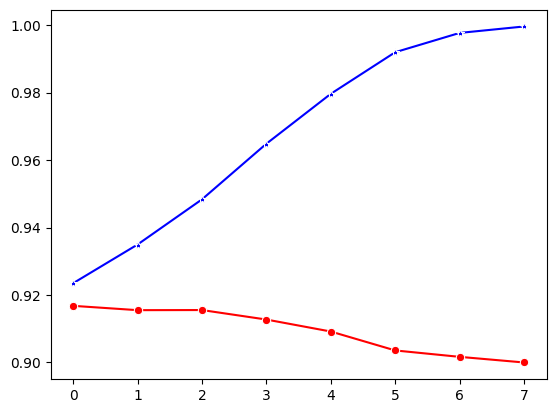

In [24]:
# Build model of prediction with XGBRegressor
train_scores = []
test_scores = []
for i in range(2, 10):
    xgbr = XGBRegressor(n_estimators = i*20, max_depth = i+1, max_features = 0.05*i)
    xgbr.fit(X_train, y_train)
    
    train_scores.append(xgbr.score(X_train, y_train))
    test_scores.append(xgbr.score(X_test, y_test))
    
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

In [25]:
# i = 9
xgbr = XGBRegressor(n_estimators =180, max_depth = 10, max_features = 0.45)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_features=0.45,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=180,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
# Prepare test data
test = pd.read_csv("test.csv")
tt = test.copy()
test.drop("id", axis = 1, inplace = True)
test

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,173.0,12.5,0.25,0.250,0.38,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10,0.502418,0.379343,31.798351
1,261.0,12.5,0.25,0.250,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10,0.535137,0.446570,37.323225
2,172.0,12.5,0.25,0.250,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.538704,0.472761,39.230391
3,672.0,25.0,0.50,0.380,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.583379,0.486889,40.922101
4,528.0,25.0,0.50,0.250,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.559215,0.460322,38.341781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18.0,37.5,0.25,0.250,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.283055,0.239883,24.320627
9996,595.0,25.0,0.50,0.250,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.529164,0.437063,36.805034
9997,771.0,25.0,0.50,0.117,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.437188,0.426773,33.125467
9998,581.0,25.0,0.50,0.250,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.407564,0.409261,32.433976


In [34]:
# Predict of target("yield")
y_xgbr = xgbr.predict(test)
len(y_xgbr)
pd.DataFrame({'id': tt['id'], 'yield':y_xgbr}).to_csv('YieldPrediction_1.csv', index=False)

In [29]:
# Prepare submission data
# submission = pd.read_csv("/kaggle/input/playground-series-s3e14/sample_submission.csv")
# submission.drop("id", axis = 1, inplace = True)
# submission

In [23]:
# # Evaluate model with MAE score
# print("MAE Score :", mean_absolute_error(y_xgbr, submission))

MAE Score : 1305.9625151203372
